In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Implement K-means clustering for the USArrest.csv and group the data points in to different categories. The criminal data collected in various US states contains crimes committed like: assault, murder, and rape in arrests per 100,000 residents in each of the 50 US states in 1973.

Prepare a comparative analysis of the result of both algorithms

In [3]:
df=pd.read_csv("USArrests.csv")

In [4]:
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [5]:
X=df.iloc[:,1:].values

In [6]:
from sklearn.cluster import KMeans

In [7]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

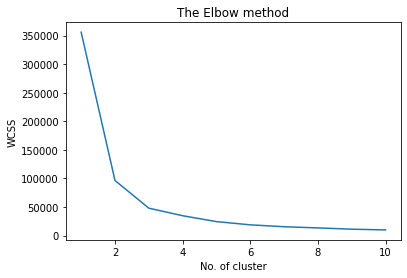

In [8]:
plt.plot(range(1,11),wcss)
plt.xlabel("No. of cluster")
plt.ylabel("WCSS")
plt.title("The Elbow method")
plt.show()

In [9]:
kmeans=KMeans(n_clusters=3,init="k-means++",n_init=10,max_iter=300,random_state=0)

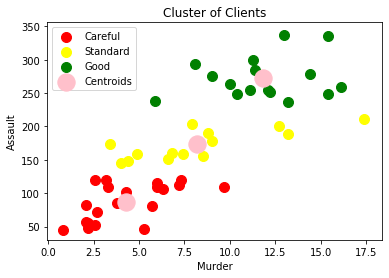

In [10]:
y_means=kmeans.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],s=100,c='red',label='Careful')
plt.scatter(X[y_means==1,0],X[y_means==1,1],s=100,c='yellow',label='Standard')
plt.scatter(X[y_means==2,0],X[y_means==2,1],s=100,c='green',label='Good')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='pink',label='Centroids')
plt.title('Cluster of Clients')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()

In [11]:
#agglomertive clustering

In [12]:
from sklearn.cluster import AgglomerativeClustering

In [13]:
import scipy.cluster.hierarchy as sch

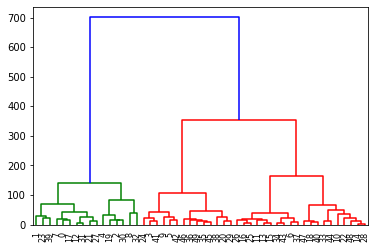

In [14]:
dendrogram=sch.dendrogram(sch.linkage(X,method='ward',metric='euclidean'))

In [15]:
cluster=AgglomerativeClustering(n_clusters=2)
cluster.fit(X)
y_pred=cluster.fit_predict(X)

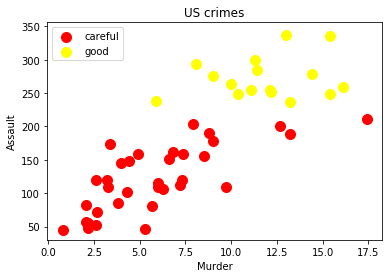

In [16]:
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],s=100,c='red',label='careful')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='yellow',label="good")
plt.title('US crimes')
plt.xlabel('Murder')
plt.ylabel('Assault')
plt.legend()
plt.show()